## A Notebook with exercises on string matching 
+ ###### Author: Dirk Van Compernolle   
+ ###### Modification History:   03/03/2023
+ ###### Requires:  pyspch>=0.7

### General Instructions
- First make the listed exercises with pencil and paper to get practice in computing with DTW/DP-style algorithms
- Check your results with the results presented later in this notebook

### Exercises

##### Exercise 1

- What is the Levenshtein Distance between following word pairs? 
     + (*word* vs *words*), (*word* vs *wods*), (*words* vs *word*)
- Did you need to calculate in a trellis or did you use an intuitive approach ?  Explain how this intuitive approach worked ?

##### Exercise 2

- What is the Levenshtein Distance between following utterances ?  Again don't compute a full trellis if you don't need it.
    + "recognize speech" vs.  "wreck a nice beach"
    + Solve the above for both  "character distance" and "word distance"
    + Find also the optimal character alignment between both utterances
    + Is the DTW distance unique ? and does this correspond to a unique alignment ?
    + Are there multiple equivalent alignments possible ?

##### Exercise 3
- Given [local distance matrix](ex3_ldmat.png), compute the distance between both numberic sequences and the alignment path


#### Exercise 4
- You are given a small corpus with *reference*-transcription and *observation* results from a speech recognition experiment.
- What is the error rate of your system

    + ref1="fauchelevent limped along behind the horse in a very contented frame of mind "
    + obs1 = "lochleven limped along behind the heard in very contented frame of mind"
    + ref2= " he would have loved to be king in such a non nonsense paradise "
    + obs2=" he had loved the king in a no sense paradigm"
    + ref3 = "do you know the names of the seven dwarfs in Disney’s Snow White movie ?"
    + obs3 =  "do you know the names of the seven warfs in the sneaze now white movie ?"

In [1]:
#!pip install git+https://github.com/compi1234/pyspch.git
try:
    import pyspch
except ModuleNotFoundError:
    try:
        print(
        """
        To enable this notebook on platforms as Google Colab, 
        install the pyspch package and dependencies by running following code:

        !pip install git+https://github.com/compi1234/pyspch.git
        """
        )
    except ModuleNotFoundError:
        raise

In [2]:
# do all the imports
%matplotlib inline
import sys, os
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pyspch.dtw as dtw

### Software
We use the **dtw** module available in pyspch.  This module was primarily developed for dtw between continuous vectors,
but may equally be applied to string matches.

Results include the *distance* and the *alignment* as well as local and global distance matrices.
This module was not specifically designed for string alignment and therefore you get no split of insertions/deletions/substitutions; instead you will find alignments of the type (x_i,y_j)  where an input atom of the x-string is matched to an atom of the y_string.  Insertions and deletions manifest themselves as repetitions in the alignment.

### Exercise 1
In order to compute the Levenshtein distance between atomic units (characters in this case), we specify
- trans = "LEV" : to allow for Levenshtein transitions corresponding to Deletions, Insertions and Substitutions
- p = 'hamming' : to have a local distance  '0' if atoms are equal and '1' if not

In [14]:
xlist = ["word","word","words"]
ylist = ["words","wods","word"]
for xx,yy in zip(xlist,ylist):
    x = np.array(list(xx))
    y = np.array(list(yy))
    lev_dist,trace = dtw.dtw(x,y,trans="LEV",p='hamming')
    print("Levenshtein Distance (%s vs %s):  %d " %(x,y,lev_dist))
    print("Alignment",dtw.align(x,y,trace))

Levenshtein Distance (['w' 'o' 'r' 'd'] vs ['w' 'o' 'r' 'd' 's']):  1 
Alignment    x  y
0  w  w
1  o  o
2  r  r
3  d  d
4  d  s
Levenshtein Distance (['w' 'o' 'r' 'd'] vs ['w' 'o' 'd' 's']):  2 
Alignment    x  y
0  w  w
1  o  o
2  r  d
3  d  s
Levenshtein Distance (['w' 'o' 'r' 'd' 's'] vs ['w' 'o' 'r' 'd']):  1 
Alignment    x  y
0  w  w
1  o  o
2  r  r
3  d  d
4  s  d


### Exercise 2
In order to compute the Levenshtein distance between atomic units (characters in this case), we specify
- trans = "LEV" : to allow for Levenshtein transitions corresponding to Deletions, Insertions and Substitutions
- p = 'hamming' : to have a local distance  '0' if atoms are equal and '1' if not

In [4]:
utt1 = "recognize speech"
utt2 = "wreck a nice beach"
x = np.array(list(utt1))
y = np.array(list(utt2))
char_dist,_ = dtw.dtw(x,y,trans="LEV",p='hamming')
print("Levenshtein CHARACTER Distance (%s vs %s):  %d " %(x,y,char_dist))
#
x = np.array(utt1.split())
y = np.array(utt2.split())
word_dist,_ = dtw.dtw(x,y,trans="LEV",p='hamming')
print("Levenshtein WORD Distance (%s vs %s):  %d " %(x,y,word_dist))

Levenshtein CHARACTER Distance (['r' 'e' 'c' 'o' 'g' 'n' 'i' 'z' 'e' ' ' 's' 'p' 'e' 'e' 'c' 'h'] vs ['w' 'r' 'e' 'c' 'k' ' ' 'a' ' ' 'n' 'i' 'c' 'e' ' ' 'b' 'e' 'a' 'c' 'h']):  10 
Levenshtein WORD Distance (['recognize' 'speech'] vs ['wreck' 'a' 'nice' 'beach']):  4 


#### Plots
In the cells below we give a detailed view of the "global distance matrix" and also a side-by-side plot of local and global matrices.

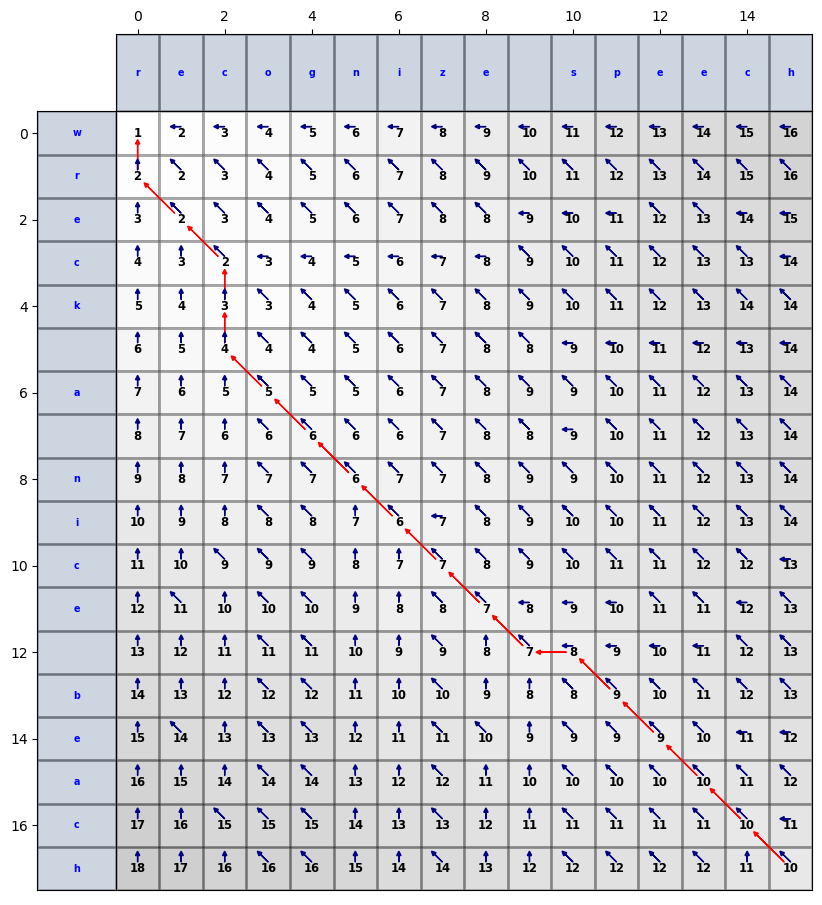

In [11]:
x = np.array(list(utt1))
y = np.array(list(utt2))
dist,trace,ld_matrix,cd_matrix,bptrs = dtw.dtw(x,y,trans="LEV",p='hamming',result='details')
plt_args = {'ftr_scale':.1,'xy_annot':True,
            'xy_args':{'cmap':'Greys','alpha':.2,'text_size':'small','fontweight':'bold','fmt':'{:.0f}'},
            'ftr_args':{'alpha':.2,'cmap':'Blues','text_color':'b','fontweight':'bold'}}
fig1 = dtw.plot_trellis(x=x,y=y,xy_mat=cd_matrix,bptrs=bptrs,trace=trace,**plt_args)
display(fig1)

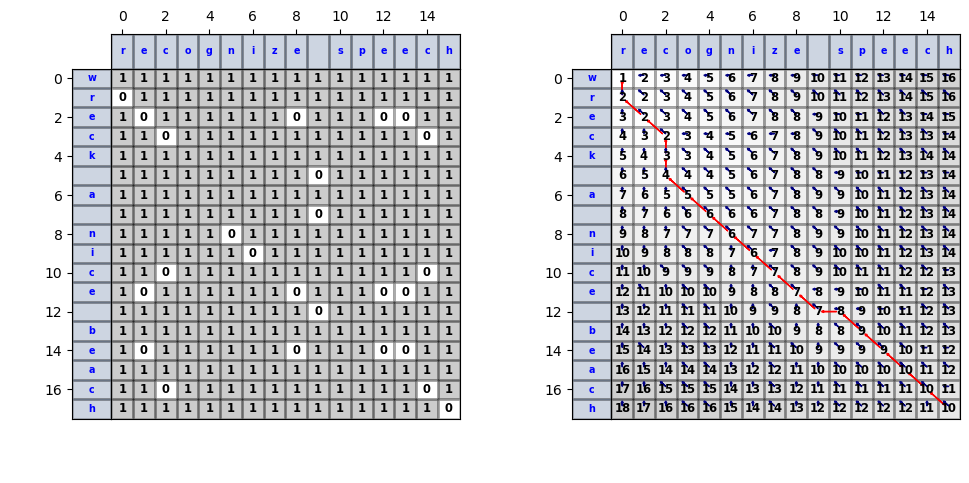

In [12]:
fig2 = dtw.plot_trellis2(x,y,left=ld_matrix,right=cd_matrix,bptrs=bptrs,trace=trace,**plt_args)
display(fig2)

### Exercise 3

DTW distance: 3.000 


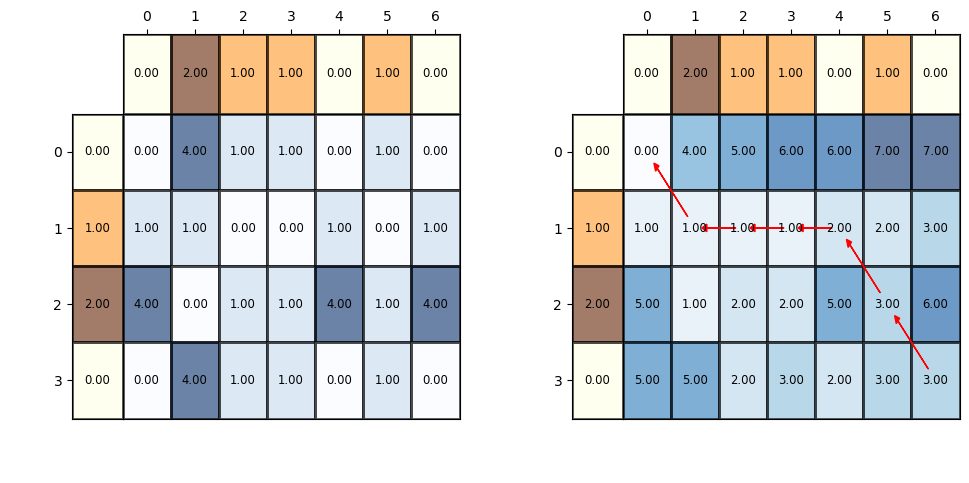

In [26]:
x1d = np.array([0, 2, 1, 1.,0.,1.,0.])
y1d = np.array([0.,1.,2.,0.])
# we also define some plotting arguments for this example
plt_args = {'xy_annot':True,'ftr_annot':True,'fig_width':10,'ftr_scale':.15,'fmt':"{:.2f}",'text_size':"small"}
dist,trace,ld_matrix,cd_matrix,bptrs = dtw.dtw(x1d,y1d,trans='DTW',result='details')
print("DTW distance: %.3f " % dist)
dtw.plot_trellis2(x=x1d,y=y1d,left=ld_matrix,right=cd_matrix,trace=trace,**plt_args)

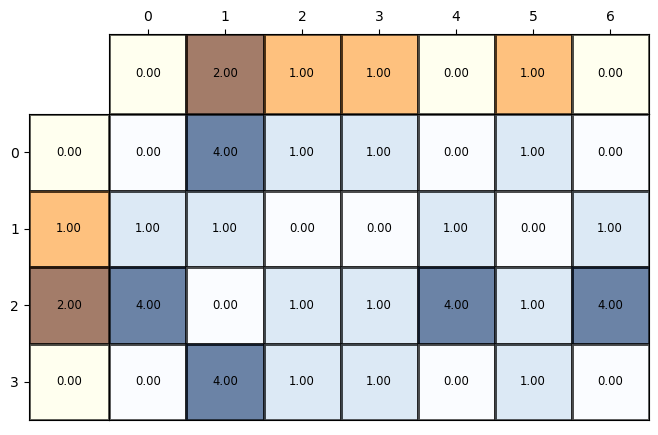

In [20]:
dtw.plot_trellis(x=x1d,y=y1d,xy_mat=ld_matrix,**plt_args)

### Exercise 4
Corpus Evaluation

In [47]:
def score_corpus(corpus):

    Ntot = 0.
    Nref = 0.
    for [reference,result] in corpus:
        ref = np.array(reference.split())
        hyp = np.array(result.split())
        dist, trace = dtw.dtw(hyp,ref,p='hamming')
        
        display(dtw.align(hyp,ref,trace).T)
        print("Errors: ",dist)            
        Ntot += dist
        Nref += len(ref)
        
    print("\n ++ CORPUS RESULTS ++ ")
    print("Error Rate: %5.2f%%" % ((100.*Ntot)/Nref)  )

In [48]:
ref1="fauchelevent limped along behind the horse in a very contented frame of mind "
obs1 = "lochleven limped along behind the heard in very contented frame of mind"

ref2= " he would have loved to be king in such a non nonsense paradise "
obs2=" he had loved the king in a no sense paradigm"

ref3 = "do you know the names of the seven dwarfs in Disney’s Snow White movie ?"
obs3 =  "do you know the names of the seven warfs in the sneaze now white movie ?"

In [49]:
# corpus scoring routine
corpus = [ [ref1,obs1], [ref2,obs2], [ref3,obs3] ]
score_corpus(corpus)

,0,1,2,3,4,5,6,7,8,9,10,11,12
x,lochleven,limped,along,behind,the,heard,in,in,very,contented,frame,of,mind
y,fauchelevent,limped,along,behind,the,horse,in,a,very,contented,frame,of,mind


Errors:  3.0


,0,1,2,3,4,5,6,7,8,9,10,11,12
x,he,he,had,loved,loved,the,king,in,in,a,no,sense,paradigm
y,he,would,have,loved,to,be,king,in,such,a,non,nonsense,paradise


Errors:  8.0


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
x,do,you,know,the,names,of,the,seven,warfs,in,the,sneaze,now,white,movie,?
y,do,you,know,the,names,of,the,seven,dwarfs,in,in,Disney’s,Snow,White,movie,?


Errors:  5.0

 ++ CORPUS RESULTS ++ 
Error Rate: 39.02%
